In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely
from libpysal import graph
from sklearn import ensemble, metrics, model_selection

In [2]:
#import notebooks

In [3]:
# Define the file paths for each GeoDataFrame
files = [
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/%german.parquet',
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/%holidayapt.parquet',
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/%rented.parquet',
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/age.parquet',
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/apartmentno.parquet',
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/buildingyear.parquet',
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/familysize.parquet',
    '/home/lisa/work/people_places_germany/Notebooks/temp_data/floorspace.parquet'
    ]

# Initialize an empty GeoDataFrame for the final combined data
combined_gdf = None

# Iterate over the files, reading only necessary columns and merging
for file in files:
    # Read 'ID', 'geometry', 'STATS', and 'cluster' columns
    gdf = gpd.read_parquet(file, columns=['ID', 'geometry', 'STATS', 'cluster'])
    
    # Generate names for 'STATS' and 'cluster' columns to avoid conflicts
    base_name = file.split('/')[-1].replace('.parquet', '')
    stat_col_name = base_name
    
    # Rename the columns
    gdf.rename(columns={'STATS': stat_col_name}, inplace=True)
    
    # Merge with the combined GeoDataFrame
    if combined_gdf is None:
        combined_gdf = gdf
    else:
        combined_gdf = combined_gdf.merge(gdf, on=['ID', 'geometry', 'cluster'])

# Now 'combined_gdf' contains all 'STATS' columns from the different GeoDataFrames


In [78]:
combined_gdf.to_parquet('/data/processed_data/regression_stats')

In [2]:
combined_gdf = gpd.read_parquet('/data/processed_data/regression_stats')

In [3]:
combined_gdf

,ID,geometry,%german,cluster,%holidayapt,%rented,age,apartmentno,buildingyear,familysize,floorspace,label,morph_label
0,100mN27618E41614,"POLYGON ((4161500 2761900, 4161500 2761800, 41...",1.000000,16.0,0.0,0.000000,51.666667,1.00,NaN,NaN,NaN,16,3
1,100mN27625E41613,"POLYGON ((4161400 2762600, 4161400 2762500, 41...",0.920000,12.0,0.0,0.488372,45.666667,12.25,1998.0,2.600000,71.342105,12,206
2,100mN27626E41613,"POLYGON ((4161400 2762700, 4161400 2762600, 41...",0.850000,12.0,0.0,0.918919,38.220339,9.50,1934.0,2.150000,83.500000,12,206
3,100mN27628E41614,"POLYGON ((4161500 2762900, 4161500 2762800, 41...",0.947368,12.0,0.0,0.428571,33.500000,1.00,1964.0,2.500000,94.500000,12,201
4,100mN27628E41615,"POLYGON ((4161600 2762900, 4161600 2762800, 41...",1.000000,12.0,0.0,0.000000,85.000000,NaN,1964.0,2.000000,NaN,12,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,100mN27710E41605,"POLYGON ((4160600 2771100, 4160600 2771000, 41...",0.529412,15.0,0.0,1.000000,36.764706,NaN,1964.0,2.000000,54.500000,15,49
2115,100mN27710E41619,"POLYGON ((4162000 2771100, 4162000 2771000, 41...",1.000000,13.0,0.0,0.000000,51.666667,NaN,NaN,2.000000,94.500000,13,39
2116,100mN27710E41621,"POLYGON ((4162200 2771100, 4162200 2771000, 41...",1.000000,13.0,0.0,0.272727,48.600000,1.00,1964.0,2.333333,134.500000,13,109
2117,100mN27711E41603,"POLYGON ((4160400 2771200, 4160400 2771100, 41...",0.909091,15.0,0.0,1.000000,45.000000,NaN,NaN,2.000000,104.500000,15,49


In [5]:
clusters = gpd.read_parquet('/data/cluster_data/clusters_umap_freiburg_100_3_gaussian_euclidean_ward_2.pq').reset_index()

In [6]:
clusters

,index,label,geometry
0,0,1,"MULTIPOLYGON (((4157153.362 2766440.449, 41571..."
1,1,2,"MULTIPOLYGON (((4156501.649 2765144.813, 41564..."
2,2,3,"MULTIPOLYGON (((4155891.415 2767174.356, 41558..."
3,3,4,"MULTIPOLYGON (((4155971.894 2764953.022, 41559..."
4,4,5,"MULTIPOLYGON (((4157508.388 2765965.805, 41573..."
5,5,6,"MULTIPOLYGON (((4159546.337 2766842.824, 41594..."
6,6,7,"MULTIPOLYGON (((4159968.858 2765650.635, 41599..."
7,7,8,"MULTIPOLYGON (((4159835.928 2765093.904, 41597..."
8,8,9,"MULTIPOLYGON (((4156557.85 2767211.184, 415658..."
9,9,10,"MULTIPOLYGON (((4156160.439 2764915.665, 41561..."


In [33]:
morphotopes = gpd.read_parquet('/home/lisa/work/people_places_germany/Notebooks/temp_data/morphotopes_freiburg_100_3_gaussian.pq').reset_index()

In [36]:
morphotopes['morph_label'] = morphotopes.index

In [37]:
morphotopes

,label,geometry,morph_label
0,0_1.0,"POLYGON ((4162622.337 2757915.232, 4162616.364...",0
1,10_1.0,"POLYGON ((4156658.273 2764245.417, 4156644.126...",1
2,11_1.0,"POLYGON ((4160704.542 2763120.268, 4160719.303...",2
3,12_1.0,"POLYGON ((4161466.256 2762088.504, 4161470.945...",3
4,13_1.0,"POLYGON ((4161456.543 2762163.225, 4161455.52 ...",4
...,...,...,...
207,5_1.0,"MULTIPOLYGON (((4160220.096 2764698.39, 416023...",207
208,6_1.0,"POLYGON ((4157106.219 2767977.804, 4157091.643...",208
209,7_1.0,"POLYGON ((4155399.573 2764674.046, 4155372.305...",209
210,8_1.0,"POLYGON ((4155113.611 2764516.483, 4155102.012...",210


In [ ]:
overlap = gpd.overlay(combined_gdf, clusters, how='intersection')

In [38]:
overlap = gpd.overlay(combined_gdf, morphotopes, how='intersection')

In [39]:
# Calculate the area of overlap
overlap['area'] = overlap.geometry.area

# Find the cluster with the largest overlap for each cell
largest_overlap = overlap.loc[overlap.groupby(overlap['ID'])['area'].idxmax()]

In [40]:
combined_gdf = combined_gdf.merge(largest_overlap[['ID', 'morph_label']], on='ID')

In [45]:
combined_gdf.explore(column='morph_label',cmap='tab20')

In [10]:
# Assuming gdf is your GeoDataFrame
nan_percentage = combined_gdf.isna().mean() * 100

# Display the percentage of NaN values for each column
print(nan_percentage)

ID              0.000000
geometry        0.000000
%german         0.000000
cluster         0.000000
%holidayapt     0.188768
%rented         0.188768
age             0.094384
apartmentno     6.134969
buildingyear    7.456347
familysize      3.020293
floorspace      4.388863
label           0.000000
dtype: float64


In [24]:
combined_gdf.columns

Index(['ID', 'geometry', '%german', 'cluster', '%holidayapt', '%rented', 'age',
       'apartmentno', 'buildingyear', 'familysize', 'floorspace', 'label'],
      dtype='object')

# random forest

In [109]:
training_sample = combined_gdf.sample(2000, random_state=0)

In [110]:
independent_variables = [
    "%german",
    "%holidayapt",
    "%rented",
    "age",
    "apartmentno",
    "buildingyear",
    "familysize",
    "floorspace"
]

In [111]:
independent = training_sample[independent_variables]
independent

,%german,%holidayapt,%rented,age,apartmentno,buildingyear,familysize,floorspace
1986,1.000000,0.0,0.280000,43.260870,2.033333,1964.000000,2.923077,108.184211
1070,0.649770,0.0,0.967320,30.092166,15.000000,NaN,3.344538,84.071429
1734,1.000000,0.0,0.000000,65.000000,1.000000,NaN,NaN,200.000000
938,0.948718,0.0,0.333333,43.205128,1.363636,1970.333333,2.750000,108.375000
135,0.937500,0.0,0.333333,34.687500,1.428571,2003.000000,3.000000,173.000000
...,...,...,...,...,...,...,...,...
1304,0.860656,0.0,0.946429,40.327869,9.500000,1964.000000,2.937500,75.409091
286,0.942857,0.0,0.857143,37.857143,2.000000,1983.000000,2.300000,51.263158
1613,0.913043,0.0,0.500000,47.903226,2.894737,1980.733333,2.333333,86.944444
488,0.916667,0.0,0.465517,37.474227,7.000000,1993.000000,2.650000,93.887755


In [112]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(independent, training_sample["label"], test_size=0.25, random_state=0)

In [113]:
model = ensemble.RandomForestClassifier(random_state=0, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [114]:
pred = model.predict(X_test)
pred

array([14, 15,  2, 15, 13,  3,  4, 10,  2,  5, 15, 14,  7,  9, 13, 14,  9,
        5, 10,  5, 14,  5,  2,  6,  5,  3,  1,  5,  9,  5,  2,  9, 13,  9,
        5, 14,  9, 11, 13,  3,  7,  5,  9,  6, 12, 13,  7, 13,  2,  5,  5,
        1, 15, 14,  9, 14,  9,  3, 14, 14, 14, 13, 13, 12, 14, 13, 13,  9,
        4,  9, 13,  5, 12,  4, 11, 13,  4,  7,  3,  9, 13,  9,  5, 14, 11,
        1,  9, 13,  9,  2,  9, 13, 13,  5, 14,  2, 13,  1,  9, 13,  5, 14,
       13,  3, 14, 12, 14,  6, 15, 15, 14, 14, 13,  1, 11,  2, 13, 12,  5,
        9,  3, 13,  2,  9,  2,  5,  2,  9, 14,  9, 11,  9, 14,  9, 13, 10,
        2,  2, 13, 12,  5, 13,  5, 14,  2,  2, 12,  2,  9,  9,  9, 14,  7,
       14, 14,  2,  5,  9,  5,  5, 13, 13, 13,  3, 13,  1,  5,  2,  2, 13,
       13,  9,  5, 10,  3,  3, 13,  9, 14,  3, 14,  6, 10,  5,  3, 13, 13,
        9, 13,  6, 13,  4, 13,  6, 10, 11,  3, 14,  2, 12, 13,  5, 13,  2,
       13,  5,  5,  5, 11,  3,  5,  1, 12, 13,  6,  9,  2, 14,  7, 14, 14,
        5, 14,  5,  5, 14

In [115]:
y_test

1210    14
2053    12
846      2
398     14
1308    11
        ..
1525    14
2103    13
1704    17
1408    15
975     17
Name: label, Length: 500, dtype: int32

In [116]:
proba = model.predict_proba(X_test)
proba

array([[0.  , 0.  , 0.  , ..., 0.11, 0.  , 0.  ],
       [0.  , 0.  , 0.03, ..., 0.34, 0.  , 0.01],
       [0.01, 0.35, 0.08, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.05, ..., 0.02, 0.  , 0.02],
       [0.03, 0.07, 0.03, ..., 0.07, 0.  , 0.  ],
       [0.  , 0.09, 0.01, ..., 0.07, 0.  , 0.03]])

In [117]:
model.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int32)

In [118]:
pd.DataFrame(proba, columns=model.classes_, index=X_test.index)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1210,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.07,0.59,0.11,0.0,0.00
2053,0.00,0.00,0.03,0.02,0.29,0.02,0.00,0.00,0.05,0.00,0.00,0.00,0.02,0.22,0.34,0.0,0.01
846,0.01,0.35,0.08,0.02,0.06,0.02,0.01,0.01,0.05,0.04,0.10,0.11,0.02,0.12,0.00,0.0,0.00
398,0.01,0.00,0.01,0.05,0.20,0.00,0.00,0.00,0.02,0.00,0.11,0.08,0.16,0.06,0.23,0.0,0.07
1308,0.03,0.01,0.09,0.05,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.07,0.67,0.02,0.01,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,0.00,0.00,0.04,0.05,0.26,0.00,0.00,0.00,0.15,0.00,0.02,0.00,0.13,0.23,0.12,0.0,0.00
2103,0.16,0.05,0.05,0.20,0.00,0.00,0.00,0.02,0.00,0.00,0.12,0.10,0.15,0.12,0.00,0.0,0.03
1704,0.01,0.00,0.05,0.07,0.01,0.00,0.00,0.04,0.03,0.00,0.05,0.10,0.51,0.09,0.02,0.0,0.02
1408,0.03,0.07,0.03,0.01,0.17,0.03,0.02,0.00,0.09,0.00,0.00,0.11,0.12,0.25,0.07,0.0,0.00


In [119]:
accuracy = metrics.accuracy_score(pred, y_test)
kappa = metrics.cohen_kappa_score(pred, y_test)

summary = f"""\
Evaluation metrics
==================
Basic model:
  Accuracy: {round(accuracy, 3)}
  Kappa:    {round(kappa, 3)}
"""

print(summary)

Evaluation metrics
Basic model:
  Accuracy: 0.238
  Kappa:    0.161



In [120]:
pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values()

%holidayapt     0.008917
familysize      0.128089
buildingyear    0.136710
%rented         0.138590
apartmentno     0.138603
%german         0.139086
floorspace      0.154630
age             0.155374
dtype: float64

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


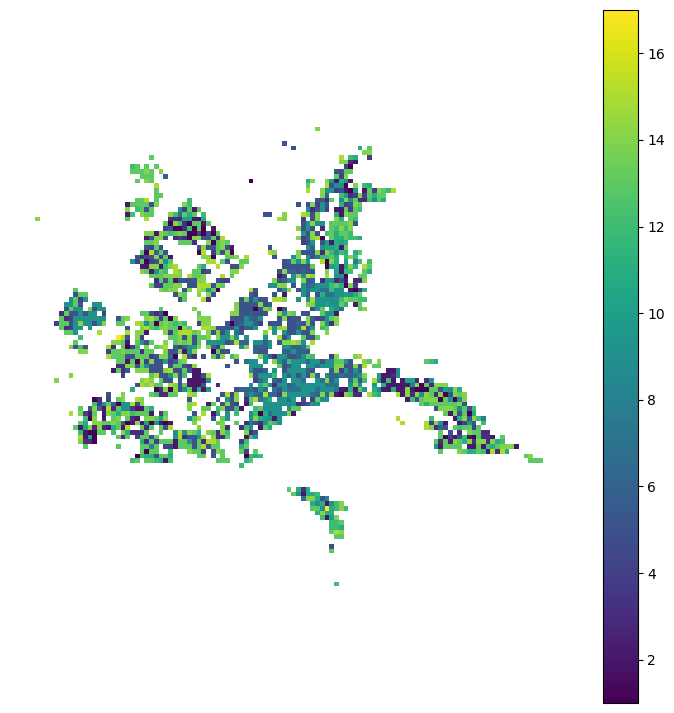

In [121]:
predicted = model_selection.cross_val_predict(
    model, independent, training_sample["label"], cv=4, n_jobs=-1
)

ax = training_sample.plot(predicted, legend=True, figsize=(9, 9), markersize=0.1)
ax.set_axis_off()

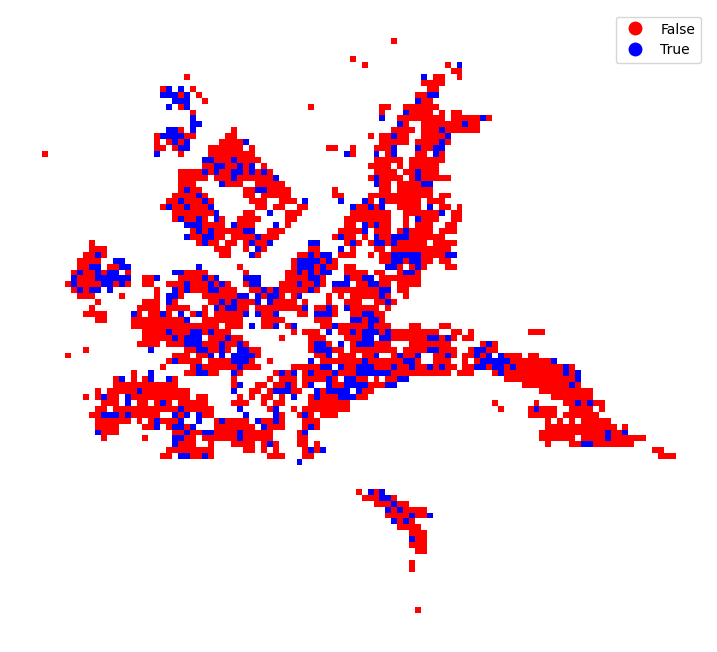

In [122]:
ax = training_sample.plot(
    predicted == training_sample["cluster"],
    categorical=True,
    figsize=(9, 9),
    markersize=0.1,
    cmap="bwr_r",
    legend=True,
)
ax.set_axis_off()

In [123]:
gkf = model_selection.StratifiedGroupKFold(n_splits=5)
splits = gkf.split(
    training_sample,
    training_sample.label,
    groups=training_sample.morph_label,
)

In [124]:
gkf

StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False)

In [125]:
split_label = np.empty(len(training_sample), dtype=float)
for i, (train, test) in enumerate(splits):
    split_label[test] = i
training_sample["split"] = split_label


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:994: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


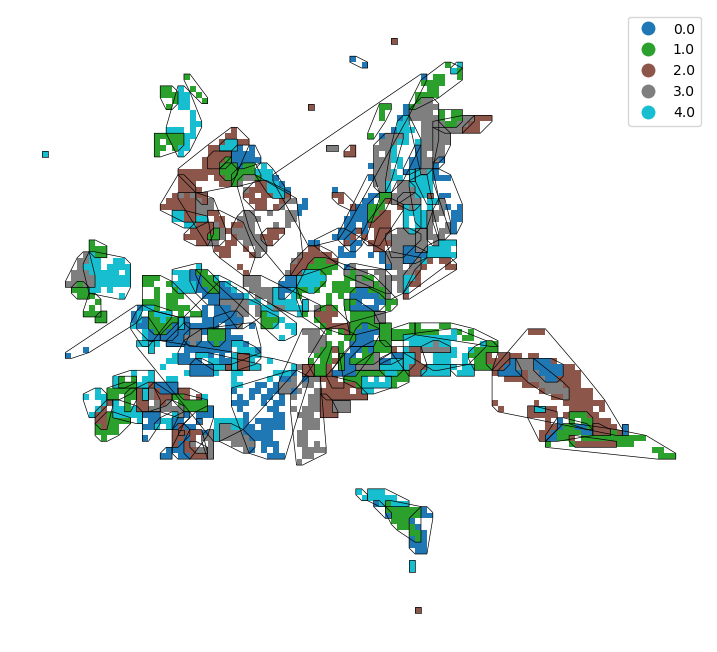

In [126]:
ax = training_sample.plot(
  "split", categorical=True, figsize=(9, 9), markersize=0.1, legend=True
)
training_sample.dissolve("morph_label").convex_hull.boundary.plot(
    ax=ax, color="k", linewidth=0.5, markersize=0
)
ax.set_axis_off()

In [127]:
train = training_sample["split"] != 0
X_train = independent.loc[train]
y_train = training_sample["label"].loc[train]

test = training_sample["split"] == 0
X_test = independent.loc[test]
y_test = training_sample["label"].loc[test]

In [128]:
rf_spatial_cv = ensemble.RandomForestClassifier(random_state=0, n_jobs=-1)
rf_spatial_cv.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [132]:
# sample size 2000

In [131]:
pred = rf_spatial_cv.predict(X_test)

accuracy_spatial_cv = metrics.accuracy_score(pred, y_test)
kappa_spatial_cv = metrics.cohen_kappa_score(pred, y_test)

summary += f"""\
Basic model with spatial cross-validation:
  Accuracy: {round(accuracy_spatial_cv, 3)}
  Kappa:    {round(kappa_spatial_cv, 3)}
"""

print(summary)

Evaluation metrics
Basic model:
  Accuracy: 0.238
  Kappa:    0.161
Basic model with spatial cross-validation:
  Accuracy: 0.173
  Kappa:    0.087



In [129]:
pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values()

%holidayapt     0.008917
familysize      0.128089
buildingyear    0.136710
%rented         0.138590
apartmentno     0.138603
%german         0.139086
floorspace      0.154630
age             0.155374
dtype: float64

In [130]:
pd.Series(rf_spatial_cv.feature_importances_, index=rf_spatial_cv.feature_names_in_).sort_values()

%holidayapt     0.009093
familysize      0.124378
buildingyear    0.136493
%rented         0.138326
%german         0.139542
apartmentno     0.139877
age             0.154632
floorspace      0.157660
dtype: float64

In [101]:
# sample size 1500

In [102]:
pred = rf_spatial_cv.predict(X_test)

accuracy_spatial_cv = metrics.accuracy_score(pred, y_test)
kappa_spatial_cv = metrics.cohen_kappa_score(pred, y_test)

summary += f"""\
Basic model with spatial cross-validation:
  Accuracy: {round(accuracy_spatial_cv, 3)}
  Kappa:    {round(kappa_spatial_cv, 3)}
"""

print(summary)

Evaluation metrics
Basic model:
  Accuracy: 0.227
  Kappa:    0.153
Basic model with spatial cross-validation:
  Accuracy: 0.133
  Kappa:    0.046



In [104]:
pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values()

%holidayapt     0.009721
familysize      0.124305
buildingyear    0.133802
%german         0.134521
%rented         0.139734
apartmentno     0.145653
age             0.151721
floorspace      0.160543
dtype: float64

In [103]:
pd.Series(rf_spatial_cv.feature_importances_, index=rf_spatial_cv.feature_names_in_).sort_values()

%holidayapt     0.008618
familysize      0.125710
%german         0.136898
apartmentno     0.138058
%rented         0.138325
buildingyear    0.141449
age             0.154131
floorspace      0.156811
dtype: float64

In [29]:
# sample size 1000

In [78]:
pred = rf_spatial_cv.predict(X_test)

accuracy_spatial_cv = metrics.accuracy_score(pred, y_test)
kappa_spatial_cv = metrics.cohen_kappa_score(pred, y_test)

summary += f"""\
Basic model with spatial cross-validation:
  Accuracy: {round(accuracy_spatial_cv, 3)}
  Kappa:    {round(kappa_spatial_cv, 3)}
"""

print(summary)

Evaluation metrics
Basic model:
  Accuracy: 0.228
  Kappa:    0.152
Basic model with spatial cross-validation:
  Accuracy: 0.179
  Kappa:    0.093



In [79]:
pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values()

%holidayapt     0.006531
familysize      0.125645
buildingyear    0.135864
%german         0.139320
apartmentno     0.139551
%rented         0.142702
age             0.149791
floorspace      0.160596
dtype: float64

In [80]:
pd.Series(rf_spatial_cv.feature_importances_, index=rf_spatial_cv.feature_names_in_).sort_values()

%holidayapt     0.006175
familysize      0.125951
apartmentno     0.135212
%german         0.137414
buildingyear    0.139595
%rented         0.143610
floorspace      0.155992
age             0.156051
dtype: float64

In [ ]:
# sample size 500